# Preprocess
### Titanic Data

feature|description|key
-|-|-
survival|Survival|0 = No, 1 = Yes
pclass|Ticket class|1 = 1st, 2 = 2nd, 3 = 3rd
sex|Sex|
Age|Age in years|
sibsp|# of siblings / spouses aboard the Titanic|
parch|# of parents / children aboard the Titanic|
ticket|Ticket number|	
fare|Passenger fare|
cabin|Cabin number|
embarked|Port of Embarkation|C = Cherbourg, Q = Queenstown, S = Southampton

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing, datasets
from matplotlib import pyplot as plt

In [8]:
### Codes for Quiz1
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing, datasets

df = sns.load_dataset('titanic')
df.dropna(axis=1, thresh=500, inplace=True)
df['age'].fillna(df['age'].mean(), inplace=True)
df['embark_town'].fillna(method='ffill', inplace=True)
df['embarked'].fillna(method='ffill', inplace=True)

df.isnull().sum()count, bin_dividers = np.histogram(df['horsepower'], bins = 3)

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [2]:
df = sns.load_dataset('titanic')

In [3]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### check NaN

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [5]:
df.isnull().sum()[df.isnull().sum() > 0]

age            177
embarked         2
deck           688
embark_town      2
dtype: int64

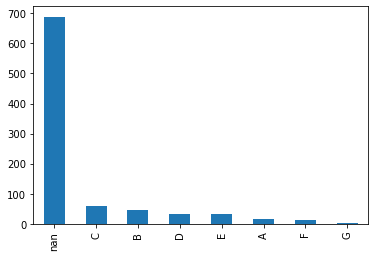

In [6]:
df['deck'].value_counts(dropna=0).plot(kind='bar')
plt.show()

### dropna - column

In [7]:
df.dropna(axis=1, thresh=500, inplace=True) # NaN값이 500개 넘어가는 컬럼은 삭제하겠다
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


### dropna - row

In [8]:
print(len(df))
df_age_nan_drop = df.dropna(subset=['age'], how='any', axis=0)
print(len(df_age_nan_drop))

891
714


In [9]:
df_age_nan_drop = df_age_nan_drop.reset_index()
df_age_nan_drop.drop('index', axis=1, inplace=True)
df_age_nan_drop.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
709,0,3,female,39.0,0,5,29.125,Q,Third,woman,False,Queenstown,no,False
710,0,2,male,27.0,0,0,13.000,S,Second,man,True,Southampton,no,True
711,1,1,female,19.0,0,0,30.000,S,First,woman,False,Southampton,yes,True
712,1,1,male,26.0,0,0,30.000,C,First,man,True,Cherbourg,yes,True
713,0,3,male,32.0,0,0,7.750,Q,Third,man,True,Queenstown,no,True


In [10]:
df_drop_age_row = df.dropna(subset = ['age', 'embark_town'],
                           how='any', axis=0)  # how=any : subset 지정된 복수의 칼럼들 중
                                                        # 하나라도 NaN이 존재하는 행을 지운다
                                                    # how=all : subset columns 모두 nan이면 행을 지운다

print(len(df), len(df_drop_age_row))

891 712


In [11]:
df_drop_age_row.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     712 non-null    int64   
 1   pclass       712 non-null    int64   
 2   sex          712 non-null    object  
 3   age          712 non-null    float64 
 4   sibsp        712 non-null    int64   
 5   parch        712 non-null    int64   
 6   fare         712 non-null    float64 
 7   embarked     712 non-null    object  
 8   class        712 non-null    category
 9   who          712 non-null    object  
 10  adult_male   712 non-null    bool    
 11  embark_town  712 non-null    object  
 12  alive        712 non-null    object  
 13  alone        712 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 68.9+ KB


In [12]:
df_drop_age_row = df_drop_age_row.reset_index()
df_drop_age_row = df_drop_age_row.drop('index', axis=1)

In [13]:
df_drop_age_row.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
707,0,3,female,39.0,0,5,29.125,Q,Third,woman,False,Queenstown,no,False
708,0,2,male,27.0,0,0,13.000,S,Second,man,True,Southampton,no,True
709,1,1,female,19.0,0,0,30.000,S,First,woman,False,Southampton,yes,True
710,1,1,male,26.0,0,0,30.000,C,First,man,True,Cherbourg,yes,True
711,0,3,male,32.0,0,0,7.750,Q,Third,man,True,Queenstown,no,True


### 남기기로 결정한 컬럼의 결측치에 대체값 넣기
- 수치 컬럼 > 평균값
    - 기존의 컬럼 평균(대표값, 통계치)을 그대로 유지하면서 결측치 보완

In [14]:
mean_age = df['age'].mean()
print(mean_age)

29.69911764705882


In [15]:
df['age'].isnull().sum()

177

In [16]:
df['age'].fillna(mean_age, inplace=True)

df['age'].isnull().sum()

0

### object column
- 최빈값 string으로 NaN 채우기

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  889 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 79.4+ KB


In [18]:
df.isnull().sum()[df.isnull().sum() != len(df)]

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64

In [19]:
df[['embarked', 'embark_town']].dtypes

embarked       object
embark_town    object
dtype: object

In [20]:
embarked_most_freq = df['embarked'].value_counts().idxmax()
embark_town_most_freq = df['embark_town'].value_counts().idxmax()
print(embarked_most_freq, embark_town_most_freq)

S Southampton


In [21]:
df['embarked'].fillna(embarked_most_freq, inplace = True)
df['embark_town'].fillna(embark_town_most_freq, inplace = True)

In [22]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

## `fillna()` methods

### method='ffill'
- Ffill or forward-fill propagates the last observed non-null value forward until another non-null value is encountered.

### method='bfill'
- Bfill or backward-fill propagates the first observed non-null value backward until another non-null value is met.

In [23]:
df = sns.load_dataset('titanic')
df['embark_town'][827:832]

827      Cherbourg
828     Queenstown
829            NaN
830      Cherbourg
831    Southampton
Name: embark_town, dtype: object

In [24]:
df['embark_town'].fillna(method='ffill')[827:832]

827      Cherbourg
828     Queenstown
829     Queenstown
830      Cherbourg
831    Southampton
Name: embark_town, dtype: object

In [25]:
df['embark_town'].fillna(method='bfill')[827:832]

827      Cherbourg
828     Queenstown
829      Cherbourg
830      Cherbourg
831    Southampton
Name: embark_town, dtype: object

### 중복값의 삭제

In [30]:
df = pd.DataFrame({'c1' : ['a', 'a', 'b', 'b', 'a'],
                  'c2' : [1, 1, 1, 2, 2],
                  'c3' : [1, 1, 2, 2, 2]})

df

,c1,c2,c3
0,a,1,1
1,a,1,1
2,b,1,2
3,b,2,2
4,a,2,2


In [31]:
df_dup = df.duplicated() #모든 성분이 동일한 중복 행을 찾아 True, False 반환
df_dup

0    False
1     True
2    False
3    False
4    False
dtype: bool

In [32]:
df_dup_c2 = df['c2'].duplicated()  # 주어진 칼럼에서 중복된 성분을 찾아 True, False 반환
df_dup_c2

0    False
1     True
2     True
3    False
4     True
Name: c2, dtype: bool

In [33]:
df_drop_dup = df.drop_duplicates()
df_drop_dup

,c1,c2,c3
0,a,1,1
2,b,1,2
3,b,2,2
4,a,2,2


In [34]:
df_drop_dup_c2_c3 = df.drop_duplicates(subset=['c2', 'c3'])
df_drop_dup_c2_c3

,c1,c2,c3
0,a,1,1
2,b,1,2
3,b,2,2


### 데이터 형변환

In [56]:
!ls

csv
exam08_pandas_01_data_plot.ipynb
exam08_pandas_01_data_plot.py
exam08_pandas_02_pandas_base.ipynb
exam08_pandas_03_pandas_base.ipynb
exam08_pandas_03_pandas_base_tutor.ipynb
exam08_pandas_04_datafile.ipynb
exam08_pandas_05_explanatory_analysis.ipynb
exam08_pandas_06_visualization.ipynb
exam08_pandas_07_preprocessing_01.ipynb
html
tutor-note


In [10]:
### Codes for Quiz 2
df = pd.read_csv('./csv/auto-mpg.csv', header=None)
df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'name']

mpg_to_kpl = 1.60934 / 3.78541
df['kpl'] = df['mpg'] * mpg_to_kpl

df.horsepower.replace('?', np.nan, inplace=True)
df.dropna(subset=['horsepower'], axis=0, inplace=True)
df.horsepower = df.horsepower.astype('float')


count, bin_dividers = np.histogram(df['horsepower'], bins = 3)
bin_names = ['저출력', '보통출력', '고출력']
df['hp_bin'] = pd.cut(x = df['horsepower'], bins = bin_dividers, 
                              labels = bin_names, include_lowest = True)

df.head(15)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name,kpl,hp_bin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,7.652571,보통출력
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,6.377143,보통출력
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,7.652571,보통출력
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,6.802286,보통출력
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino,7.227428,보통출력
5,15.0,8,429.0,198.0,4341.0,10.0,70,1,ford galaxie 500,6.377143,고출력
6,14.0,8,454.0,220.0,4354.0,9.0,70,1,chevrolet impala,5.952000,고출력
7,14.0,8,440.0,215.0,4312.0,8.5,70,1,plymouth fury iii,5.952000,고출력
8,14.0,8,455.0,225.0,4425.0,10.0,70,1,pontiac catalina,5.952000,고출력
9,15.0,8,390.0,190.0,3850.0,8.5,70,1,amc ambassador dpl,6.377143,고출력


In [57]:
df = pd.read_csv('./csv/auto-mpg.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [58]:
df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'name']
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [59]:
mpg_to_kpl = 1.60934 / 3.78541
df['kpl'] = df['mpg'] * mpg_to_kpl # 연비, kilometer per liter

In [60]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name,kpl
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,7.652571
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,6.377143
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,7.652571
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,6.802286
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino,7.227428


In [61]:
df['kpl'] = df['kpl'].round(2)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name,kpl
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,7.65
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,6.38
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,7.65
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,6.80
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino,7.23


In [62]:
df['horsepower'].unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '?', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [63]:
df['horsepower'].value_counts().loc['?']

6

In [64]:
df['horsepower'].replace('?', np.nan, inplace = True)
'?' in df['horsepower']

False

In [65]:
df.dropna(subset=['horsepower'], axis=0, inplace=True)
df['horsepower'].isnull().sum()

0

In [66]:
df['horsepower'] = df['horsepower'].astype('float')

### 카테고리 칼럼 형변환
- numeric 칼럼 중, 수치적인 의미보다 구분의 의미가 강한 칼럼은 category 타입으로 형변환해준다.

In [67]:
df['origin'].replace({1:'USA', 2:'EU', 3:'JP'}, inplace=True)
df['origin']

0      USA
1      USA
2      USA
3      USA
4      USA
      ... 
393    USA
394     EU
395    USA
396    USA
397    USA
Name: origin, Length: 392, dtype: object

In [68]:
df['origin'] = df['origin'].astype('category')
df['origin'].dtype

CategoricalDtype(categories=['EU', 'JP', 'USA'], ordered=False)

In [69]:
df['model year'].sample(3)

362    81
211    76
142    74
Name: model year, dtype: int64

In [70]:
df['model year'] = df['model year'].astype('category')

### bin_divider 이용해서 numeric => category 컬럼 형변환하기

In [73]:
count, bin_dividers = np.histogram(df['horsepower'], bins = 3)
print(count)
print(bin_dividers)

[257 103  32]
[ 46.         107.33333333 168.66666667 230.        ]


<AxesSubplot:ylabel='Density'>

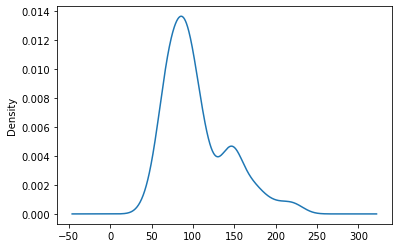

In [77]:
df['horsepower'].plot(kind='kde')

In [81]:
bin_names = ['low', 'normal', 'high']
df['horsepower_bin'] = pd.cut(x = df['horsepower'],
                     bins = bin_dividers, labels = bin_names,
                             include_lowest = True)

In [87]:
df['horsepower_bin'].dtype

CategoricalDtype(categories=['low', 'normal', 'high'], ordered=True)

In [86]:
df[['horsepower', 'horsepower_bin']].sample(10)

,horsepower,horsepower_bin
267,95.0,low
362,120.0,normal
346,67.0,low
78,87.0,low
287,138.0,normal
139,140.0,normal
167,75.0,low
270,95.0,low
391,84.0,low
16,97.0,low


### 카테고리 컬럼(string)을 카테고리 컬럼(numeric)으로 변환하기
- `sklearn.preprocessing.LabelEncoder()`
- `sklearn.preprocessing.OneHotEncoder()`

In [88]:
label_encoder = preprocessing.LabelEncoder()
onehot_encoder = preprocessing.OneHotEncoder()

In [101]:
print(df['horsepower_bin'].values[35:45], end=" ")

['low', 'low', 'normal', 'high', 'normal', 'normal', 'high', 'high', 'high', 'normal']
Categories (3, object): ['low' < 'normal' < 'high'] 

In [100]:
onehot_labeled = label_encoder.fit_transform(df['horsepower_bin'][35:45])
print(onehot_labeled, type(onehot_labeled))

[1 1 2 0 2 2 0 0 0 2] <class 'numpy.ndarray'>


In [102]:
onehot_reshaped = onehot_labeled.reshape(-1, 1)  # 2차원 배열로 만들고 잪은데 갯수 잘 모를 때
                                                                                # 단, reshape(a, b)에서 a*b가 onehot 길이와 동일해야 함 (나머지X)
print(onehot_reshaped)
print(type(onehot_reshaped))

[[1]
 [1]
 [2]
 [0]
 [2]
 [2]
 [0]
 [0]
 [0]
 [2]]
<class 'numpy.ndarray'>


In [105]:
onehot_pitted = onehot_encoder.fit_transform(onehot_reshaped)
print(onehot_pitted)

  (0, 1)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 0)	1.0
  (4, 2)	1.0
  (5, 2)	1.0
  (6, 0)	1.0
  (7, 0)	1.0
  (8, 0)	1.0
  (9, 2)	1.0


### 스케일링
- `StandardScaler` 표준화
- `Normalizer` 정규화
- `MinMaxScaler` 민맥스

In [107]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler

In [108]:
data = np.array([4, 5, 6, 7, 8])
df_data = pd.DataFrame(data)
df_data

,0
0,4
1,5
2,6
3,7
4,8


In [112]:
df_data_min = df_data.min()
df_data_max = df_data.max()

In [115]:
print(type(df_data_min), type(df_data_max))
print(df_data_min[0], df_data_max[0])

<class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'>
4 8


### Min-Max Scaling
$$(data - min(data)) / (max(data) - min(data))$$

In [17]:
### Codes for Quiz 3

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
horsepower = np.array(df['horsepower']).reshape(-1, 1)

df['horsepower'] = scaler.fit_transform(horsepower).flatten()
df['horsepower'].describe()

count    392.000000
mean       0.317768
std        0.209191
min        0.000000
25%        0.157609
50%        0.258152
75%        0.434783
max        1.000000
Name: horsepower, dtype: float64

In [120]:
df_data_minmax = (df_data - df_data_min[0]) / (df_data_max[0] - df_data_min[0])
df_data_minmax

,0
0,0.00
1,0.25
2,0.50
3,0.75
4,1.00


In [149]:
### Using sklearn.preprocessing.MinMaxScaler

mimaxscaler = MinMaxScaler()
df_data_minmax_sklearn = mimaxscaler.fit_transform(data.reshape(-1, 1))
df_data_minmax_sklearn

array([[0.  ],
       [0.25],
       [0.5 ],
       [0.75],
       [1.  ]])

In [134]:
df['horsepower'].describe()

count    392.000000
mean     104.469388
std       38.491160
min       46.000000
25%       75.000000
50%       93.500000
75%      126.000000
max      230.000000
Name: horsepower, dtype: float64

In [155]:
horsepower_minmax = (df.horsepower - df.horsepower.min()) / (df.horsepower.max() - df.horsepower.min())

In [156]:
horsepower_minmax[:5]

0    0.456522
1    0.646739
2    0.565217
3    0.565217
4    0.510870
Name: horsepower, dtype: float64

In [157]:
horsepower_minmax = np.array(horsepower_minmax).reshape(-1, 1)
mimaxscaler.fit_transform(horsepower_minmax)[:5]

array([[0.45652174],
       [0.64673913],
       [0.56521739],
       [0.56521739],
       [0.51086957]])